# Analysing evaluation results for composite reward with accum waiting time for 4x4grid_resco_train

In [1]:
import os
import pandas as pd
import numpy as np
import sys 

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

sys.path.append(os.path.abspath('../'))
from data_analysis_functions import generate_summary_df_from_csv, \
                                    get_df_from_csv, \
                                    get_trained_and_fixed_from_csv, \
                                    generate_summary_df_from_csv_for_4x4grid_resco # type: ignore


%config InlineBackend.figure_format = 'svg'

In [2]:
path_to_save_figs = os.path.abspath("images_for_report_4x4")
figsize = (10,6)
path_to_save_figs

'/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/data_analysis_for_4x4resco/images_for_report_4x4'

In [3]:
eval_folder_type = "original_scaled_route_flow_file_evaluation"

In [4]:
ids = ["A3", "B3", "C3", "D3", "A2", "B2", "C2", "D2", "A1", "B1", "C1", "D1", "A0", "B0", "C0", "D0"]

## Get Total Loss for all 

In [5]:
from tensorflow.python.summary.summary_iterator import summary_iterator

In [6]:
path_to_save_total_loss_data = "images_for_report_4x4/total_loss"
os.makedirs(path_to_save_total_loss_data, exist_ok=True)

In [7]:
def get_total_loss_from_log_file(log_file):
    tag = 'ray/tune/info/learner/__all__/total_loss'

    col_name = log_file.split('/')[-3]

    total_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                total_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(total_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 

In [8]:
CODC_trained_training_results_tf = "azure_train/4x4grid_resco_train/4x4grid_env_resco_train_with_capped_reward_3s_continue/TRAINING/PPO_2024-05-25_02_37__alpha_1/PPO_4x4grid_resco_train_2024-05-25_02_37_c42a4_00000_0_2024-05-25_02-37-44/events.out.tfevents.1716604688.loveen011"
CODC_trained_training_results_tf = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", CODC_trained_training_results_tf)

DODC_trained_training_results_tf = "azure_train/4x4grid_resco_train/4x4grid_env_resco_train_with_capped_reward_reduced_obs_3s/TRAINING/PPO_2024-05-21_21_57__alpha_1_neighbour_observations_3s/PPO_4x4grid_resco_train_2024-05-21_21_57_201c8_00000_0_2024-05-21_21-57-32/events.out.tfevents.1716328682.e5e3b0c0ae0848e1a86aeba6441b3da7000000"
DODC_trained_training_results_tf = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", DODC_trained_training_results_tf)

In [9]:
total_loss_series_dict_df_CODC = get_total_loss_from_log_file(CODC_trained_training_results_tf)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [10]:
total_loss_series_dict_df_DODC = get_total_loss_from_log_file(DODC_trained_training_results_tf)

## Plot CODC Total Loss 

In [26]:
plt.style.use('ggplot')

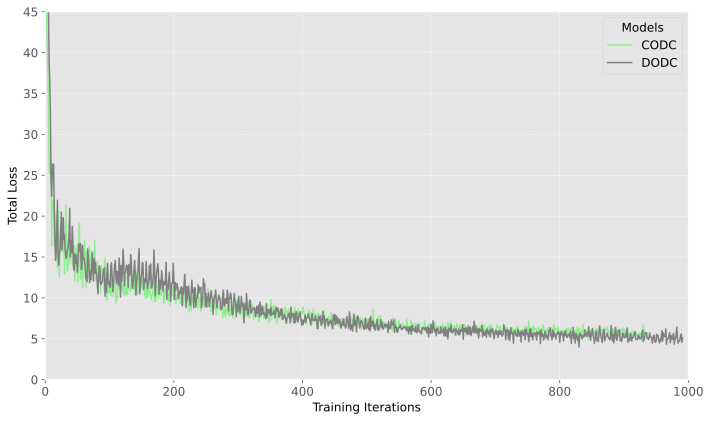

In [27]:
import matplotlib.pyplot as plt

# Assuming total_loss_series_dict_df_CODC and total_loss_series_dict_df_DODC are provided as lists or arrays

fig, axs = plt.subplots(figsize=(10, 6))

line_width = 1.5

plt.style.use('ggplot')
# Plot each series with distinct styles
axs.plot(total_loss_series_dict_df_CODC, label='CODC', color='lightgreen', linestyle='-', linewidth=line_width)
axs.plot(total_loss_series_dict_df_DODC, label='DODC', color='grey', linestyle='-', linewidth=line_width)

# Add a legend
axs.legend(fontsize='12', title='Models', title_fontsize='12', loc='upper right')

# ($\times 10^3$ Environment Steps)
# Set labels and title
axs.set_xlabel(r'Training Iterations', fontsize=12)
axs.set_ylabel('Total Loss', fontsize=12)
# axs.set_title('Total Loss over Training Iterations', fontsize=14)

# Customize grid
axs.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize ticks
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_ylim([0, 45])
axs.set_xlim([0, 1000])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_total_loss_data, 'ctce_and_dtde_total_loss.pdf'))

# Show the plot
plt.show()

## Larger Loss figure

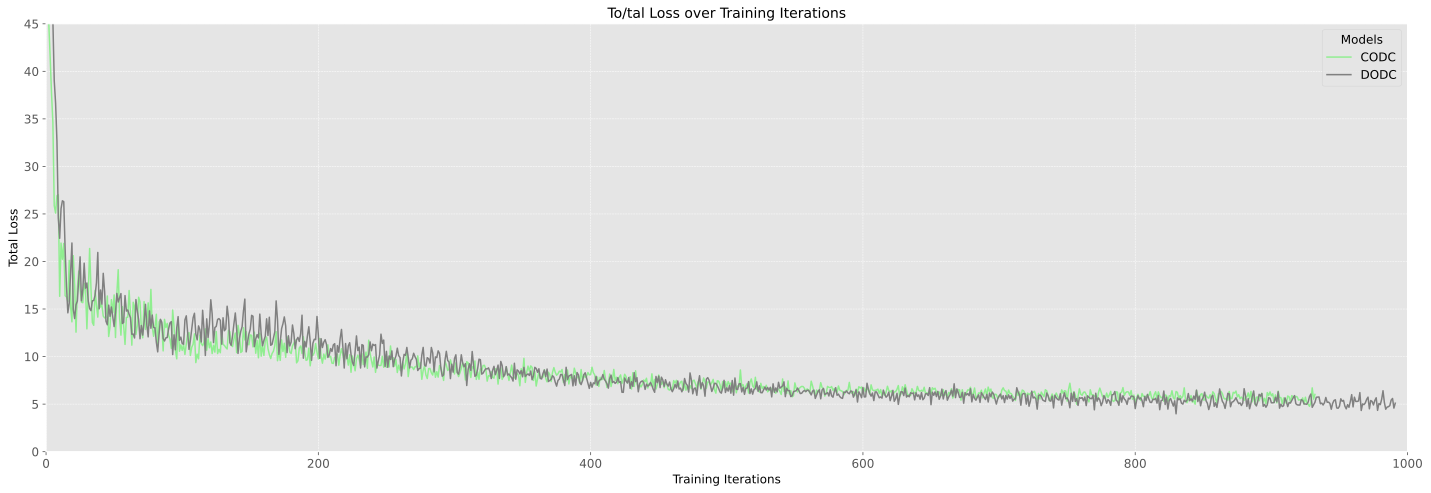

In [28]:
import matplotlib.pyplot as plt

# Assuming total_loss_series_dict_df_CODC and total_loss_series_dict_df_dtde are provided as lists or arrays

fig, axs = plt.subplots(figsize=(20, 7))

line_width = 1.5

# Plot each series with distinct styles
axs.plot(total_loss_series_dict_df_CODC, label='CODC', color='lightgreen', linestyle='-', linewidth=line_width)
axs.plot(total_loss_series_dict_df_DODC, label='DODC', color='grey', linestyle='-', linewidth=line_width)

# Add a legend
axs.legend(fontsize='12', title='Models', title_fontsize='12', loc='upper right')

# ($\times 10^3$ Environment Steps)
# Set labels and title
axs.set_xlabel(r'Training Iterations', fontsize=12)
axs.set_ylabel('Total Loss', fontsize=12)
axs.set_title('To/tal Loss over Training Iterations', fontsize=14)

# Customize grid
axs.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize ticks
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_ylim([0, 45])
axs.set_xlim([0, 1000])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_total_loss_data, 'ctce_and_dtde_total_loss_full_page.pdf'))

# Show the plot
plt.show()

## Get Total Loss for individual Agents for both models CODC, DTDE

In [29]:
ids = ["A3", "B3", "C3", "D3", "A2", "B2", "C2", "D2", "A1", "B1", "C1", "D1", "A0", "B0", "C0", "D0"]

In [30]:
def get_vf_loss_from_log_file_and_agent(log_file, agent_id):
    tag = "ray/tune/info/learner/"+str(agent_id)+"/total_loss"
    col_name = log_file.split('/')[-3]

    vf_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                vf_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 

def get_loss_from_log_file(log_file):
    labels = [f"ray/tune/info/learner/{id}/total_loss" for id in ids]

    loss_series_dict = {f"total_loss_{agent_id}" : [] for agent_id in ids}

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag in labels:
                tag = value.tag
                agent_id = tag.split('/')[-2]
                col_name = f"total_loss_{agent_id}"
                loss_series_dict[col_name].append(value.simple_value)

    loss_series_dict_df = pd.DataFrame(loss_series_dict)
    
    return loss_series_dict_df 

In [31]:
losses_agent_1 = get_vf_loss_from_log_file_and_agent(CODC_trained_training_results_tf, 'A0')
# losses_agent_2 = get_vf_loss_from_log_file_and_agent(CODC_trained_training_results_tf)
# losses_agent_5 = get_vf_loss_from_log_file_and_agent(CODC_trained_training_results_tf)
# losses_agent_6 = get_vf_loss_from_log_file_and_agent(CODC_trained_training_results_tf)

In [32]:
ids = ["A3", "B3", "C3", "D3", "A2", "B2", "C2", "D2", "A1", "B1", "C1", "D1", "A0", "B0", "C0", "D0"]


In [33]:
CODC_agent_losses = get_vf_loss_from_log_file_and_agent(CODC_trained_training_results_tf, "A0")


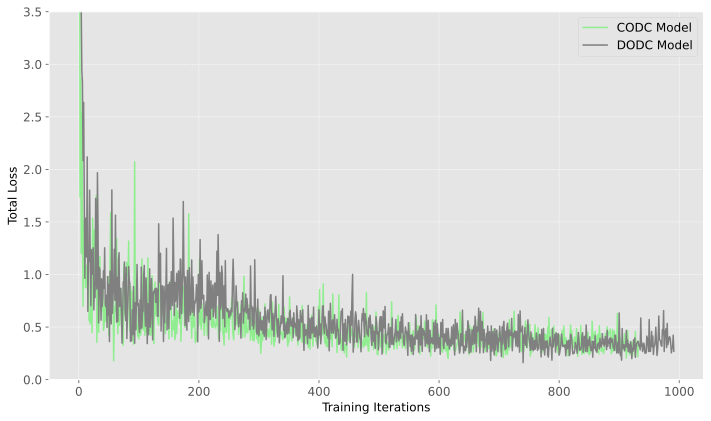

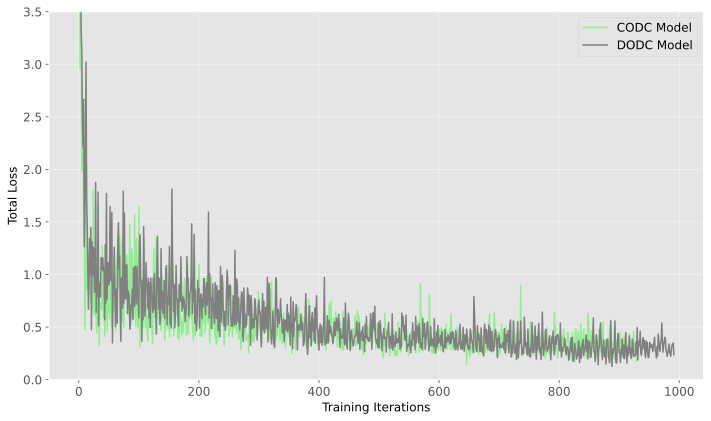

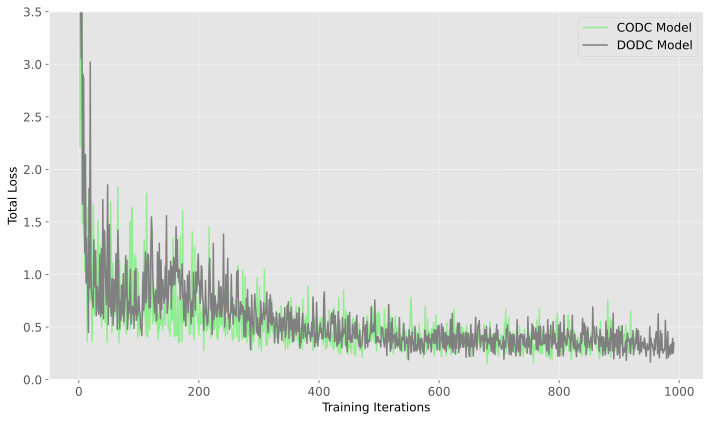

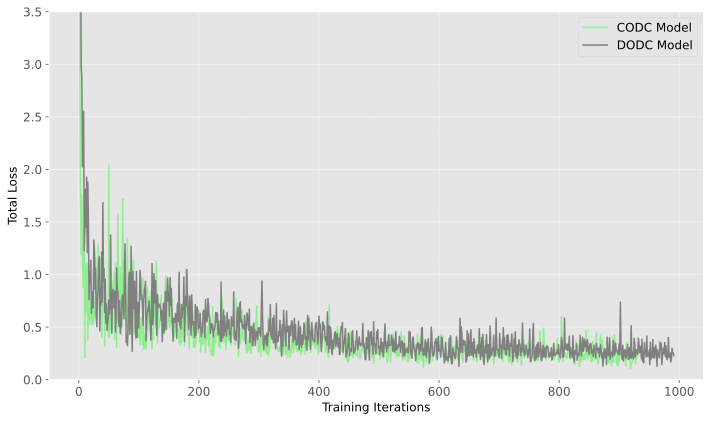

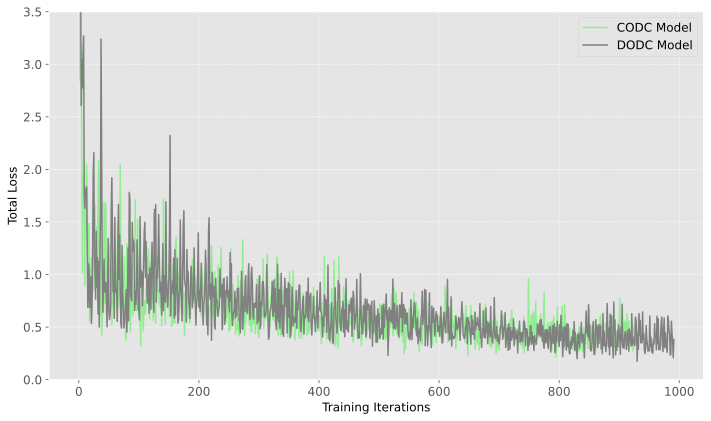

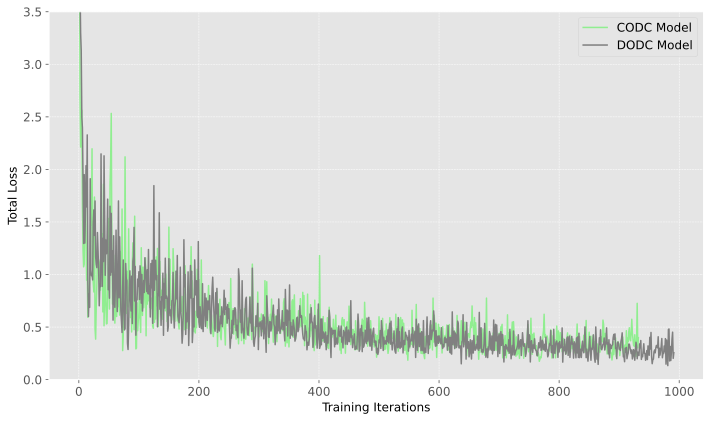

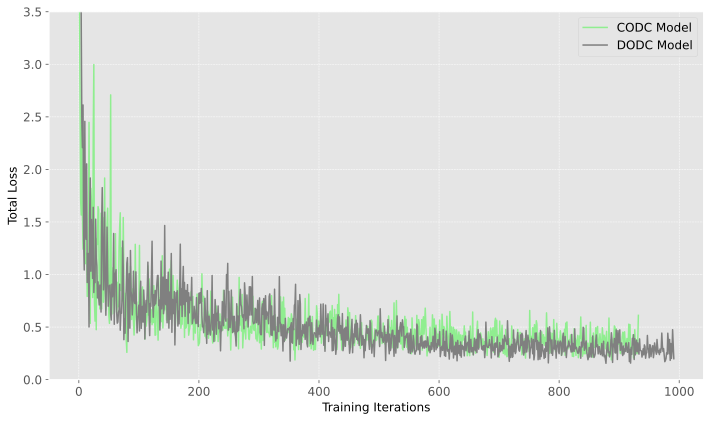

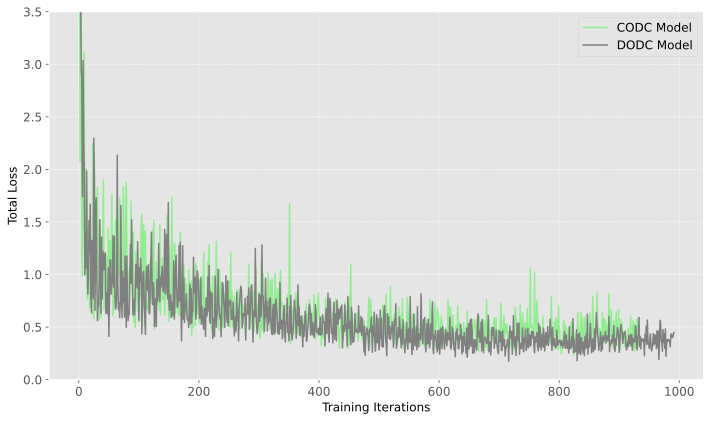

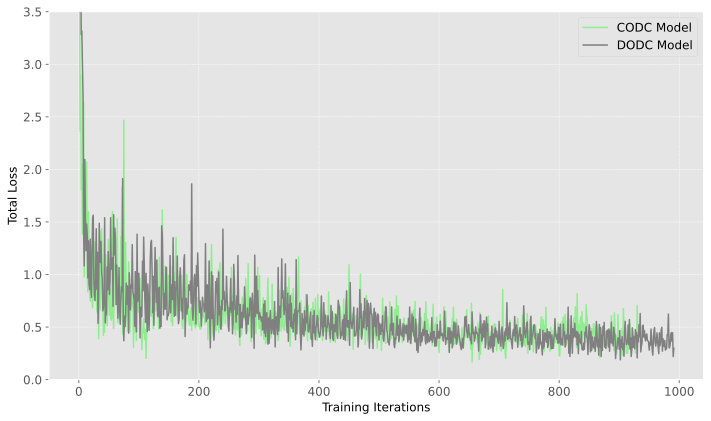

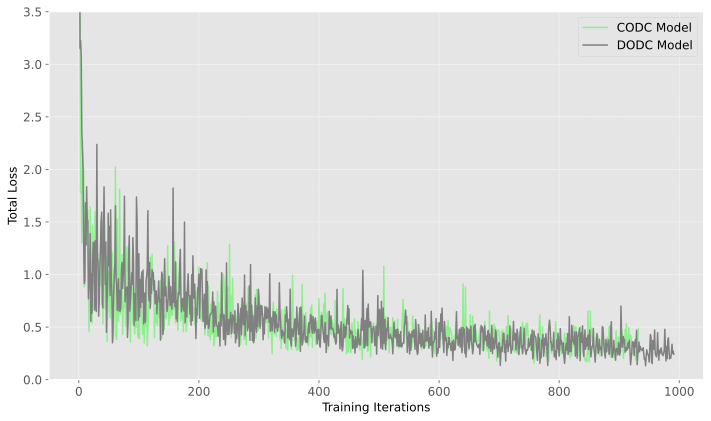

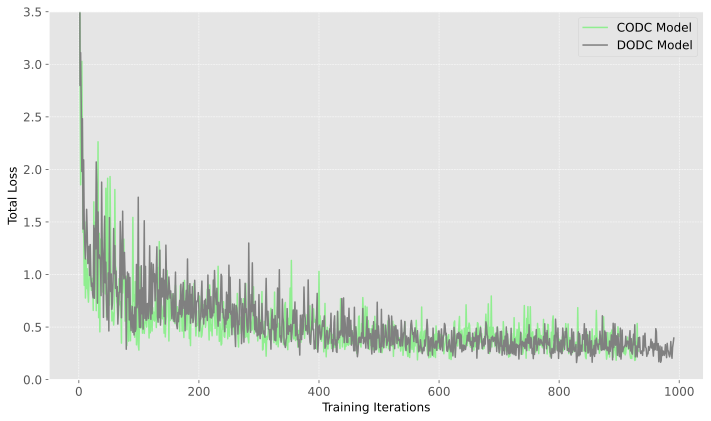

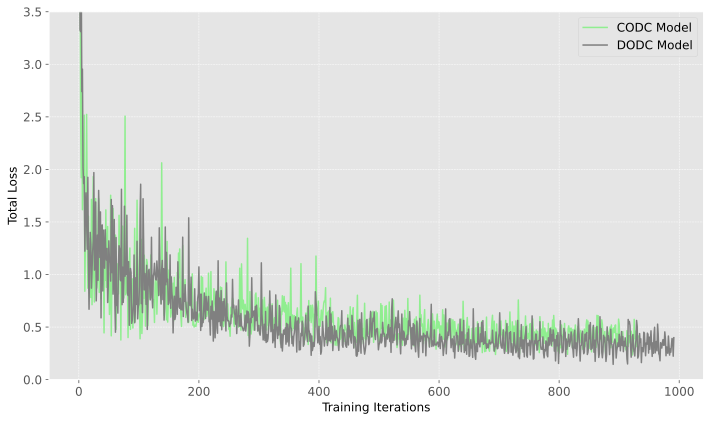

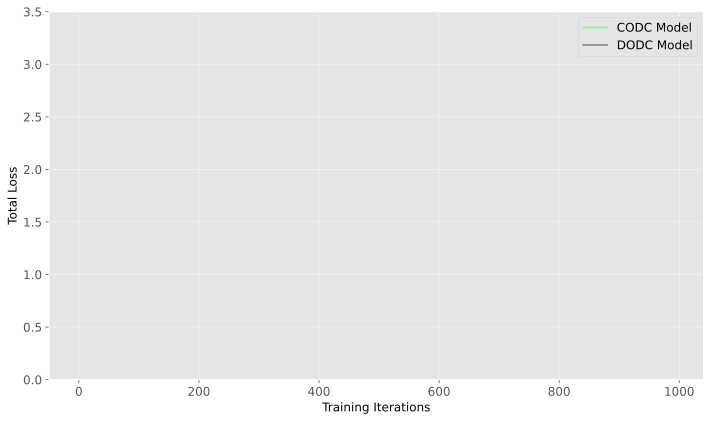

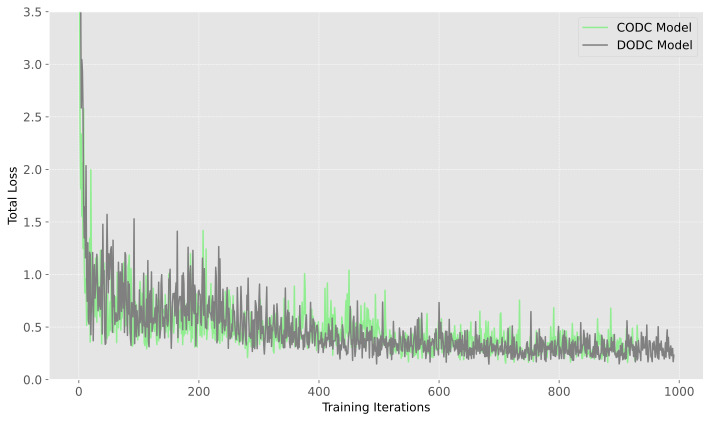

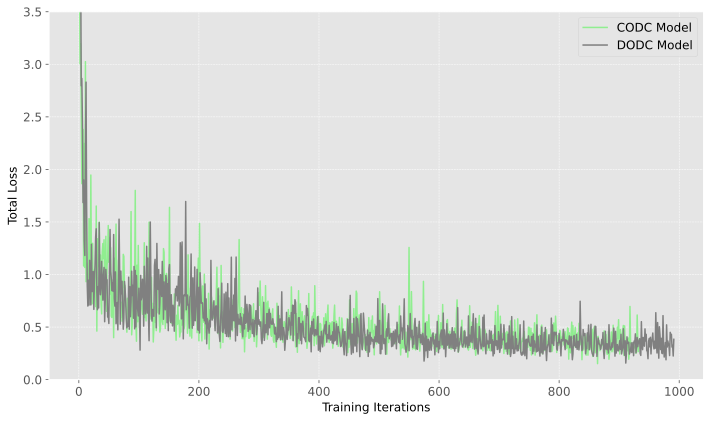

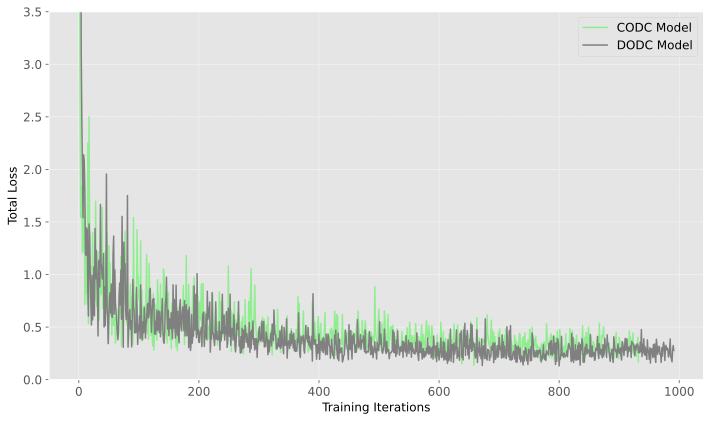

In [34]:
import matplotlib.pyplot as plt

# Assuming total_loss_series_dict_df_CODC and total_loss_series_dict_df_dtde are provided as lists or arrays


line_width = 1.5

# ($\times 10^3$ Environment Steps)

for id in ids:

    fig, axs = plt.subplots(figsize=figsize)

    CODC_agent_losses = get_vf_loss_from_log_file_and_agent(CODC_trained_training_results_tf, id)
    DODC_agent_losses = get_vf_loss_from_log_file_and_agent(DODC_trained_training_results_tf, id)

    # Plot each series with distinct styles
    axs.plot(CODC_agent_losses, label=f'CODC Model', color='lightgreen', linestyle='-', linewidth=line_width)
    axs.plot(DODC_agent_losses, label=f'DODC Model', color='grey', linestyle='-', linewidth=line_width)

    # axs.plot(total_loss_series_dict_df_dtde, label='DTDE', color='grey', linestyle='-', linewidth=line_width)

    # Add a legend
    # axs.legend(fontsize='12', title='Models', title_fontsize='12', loc='upper right')
    axs.legend(fontsize='12',loc='upper right')

    # Set labels and title
    axs.set_xlabel(r'Training Iterations', fontsize=12)
    axs.set_ylabel('Total Loss', fontsize=12)
    # axs.set_title('To/tal Loss over Training Iterations', fontsize=14)

    # Customize grid
    axs.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Customize ticks
    axs.tick_params(axis='both', which='major', labelsize=12)
    axs.set_ylim([0, 3.5])
    # axs.set_xlim([0, 1000])

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1])

    # Save the plot to a file
    plt.savefig(os.path.join(path_to_save_total_loss_data, 'individual_policy_plot_for_ctce_and_dtde', f'{id}.pdf'))

    # Show the plot
    plt.show()

    plt.close()

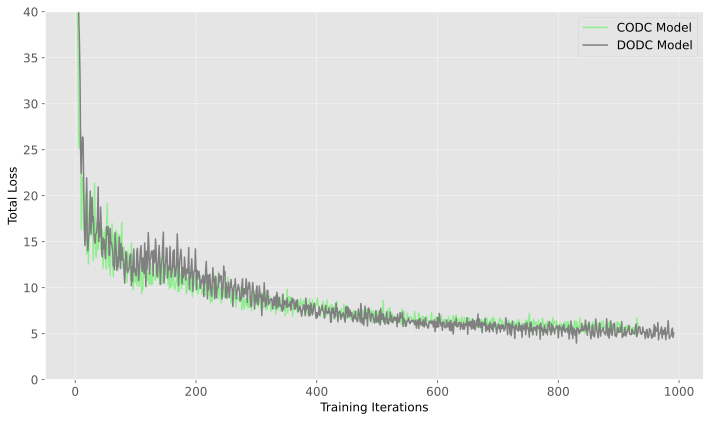

In [38]:
line_width = 1.5

# ($\times 10^3$ Environment Steps)

ids = ["A0"]
for id in ids:

    fig, axs = plt.subplots(figsize=figsize)

    CODC_agent_losses = get_vf_loss_from_log_file_and_agent(CODC_trained_training_results_tf, id)
    DODC_agent_losses = get_vf_loss_from_log_file_and_agent(DODC_trained_training_results_tf, id)

    # Plot each series with distinct styles
    axs.plot(CODC_agent_losses, label=f'CODC Model', color='lightgreen', linestyle='-', linewidth=line_width)
    axs.plot(DODC_agent_losses, label=f'DODC Model', color='grey', linestyle='-', linewidth=line_width)

    # axs.plot(total_loss_series_dict_df_dtde, label='DTDE', color='grey', linestyle='-', linewidth=line_width)

    # Add a legend
    # axs.legend(fontsize='12', title='Models', title_fontsize='12', loc='upper right')
    axs.legend(fontsize='12',loc='upper right')

    # Set labels and title
    axs.set_xlabel(r'Training Iterations', fontsize=12)
    axs.set_ylabel('Total Loss', fontsize=12)
    # axs.set_title('To/tal Loss over Training Iterations', fontsize=14)

    # Customize grid
    axs.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Customize ticks
    axs.tick_params(axis='both', which='major', labelsize=12)
    axs.set_ylim([0, 40])
    # axs.set_xlim([0, 1000])

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1])

    # Save the plot to a file
    plt.savefig(os.path.join(path_to_save_total_loss_data, 'individual_policy_plot_for_ctce_and_dtde', f'{id}.pdf'))

    # Show the plot
    plt.show()

    plt.close()

ids = ["A3", "B3", "C3", "D3", "A2", "B2", "C2", "D2", "A1", "B1", "C1", "D1", "A0", "B0", "C0", "D0"]

## Get Value function loss summed across different agents

In [20]:
def get_vf_loss_from_log_file_and_agent(log_file, agent_id):
    tag = "ray/tune/info/learner/"+str(agent_id)+"/vf_loss"
    col_name = log_file.split('/')[-3]

    vf_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                vf_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 

def get_vf_loss_from_log_file(log_file):
    labels = [f"ray/tune/info/learner/{id}/vf_loss" for id in ids]

    vf_loss_series_dict = {f"vf_loss_{agent_id}" : [] for agent_id in ids}

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag in labels:
                tag = value.tag
                agent_id = tag.split('/')[-2]
                col_name = f"vf_loss_{agent_id}"
                vf_loss_series_dict[col_name].append(value.simple_value)

    vf_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict)
    
    return vf_loss_series_dict_df 

In [21]:
vf_loss_summed_across_agents_CODC = get_vf_loss_from_log_file(CODC_trained_training_results_tf).mean(axis=1)
vf_loss_summed_across_agents_DODC = get_vf_loss_from_log_file(DODC_trained_training_results_tf).mean(axis=1)

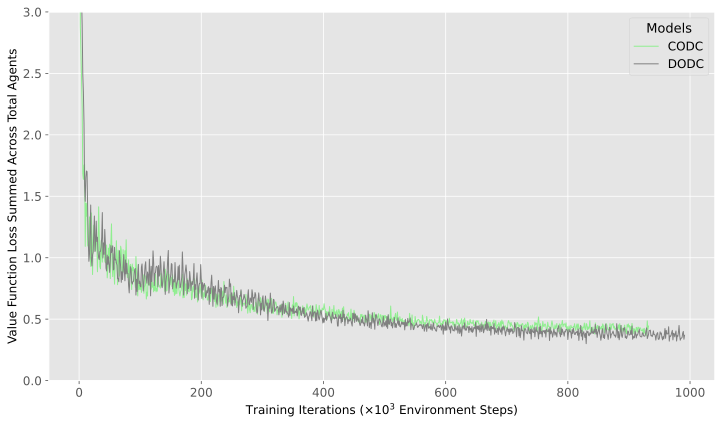

In [22]:
xlim = 250
line_width = 1

fig, axs = plt.subplots(figsize=figsize)
# Plot each series with distinct styles
plt.plot(vf_loss_summed_across_agents_CODC, label='CODC', linewidth=line_width, linestyle='-', color='lightgreen')
plt.plot(vf_loss_summed_across_agents_DODC, label='DODC', linewidth=line_width, linestyle='-', color='grey' )

# , label='Capped', linewidth=line_width, color='green')

# axs[0].set_title('Policy 1', fontsize=12, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')

plt.legend(title='Models', title_fontsize= '13', fontsize='12', loc='upper right', bbox_to_anchor=(1, 1))
plt.xlabel(r'Training Iterations ($\times 10^3$ Environment Steps)', fontsize=12)
# plt.xlim([0,153])
plt.ylabel('Value Function Loss Summed Across Total Agents', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

plt.ylim([0,3])

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_figs, "vf_loss", "total_vf_loss_across_agents_both_ctce_dtde.pdf"), dpi=10000)

# Show the plot
plt.show()
plt.close()

## VF Loss for each agent, for CODC, and DODC

In [23]:
vf_loss_all_agents_CODC = get_vf_loss_from_log_file(CODC_trained_training_results_tf)
vf_loss_all_agents_DODC = get_vf_loss_from_log_file(DODC_trained_training_results_tf)

In [24]:
vf_loss_all_agents_CODC.columns

Index(['vf_loss_A3', 'vf_loss_B3', 'vf_loss_C3', 'vf_loss_D3', 'vf_loss_A2', 'vf_loss_B2', 'vf_loss_C2', 'vf_loss_D2', 'vf_loss_A1', 'vf_loss_B1', 'vf_loss_C1', 'vf_loss_D1', 'vf_loss_A0', 'vf_loss_B0', 'vf_loss_C0', 'vf_loss_D0'], dtype='object')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/data_analysis_for_4x4resco/images_for_report_4x4/vf_loss/individual_vf_loss_for_CODC_and_dtde/A3.pdf'

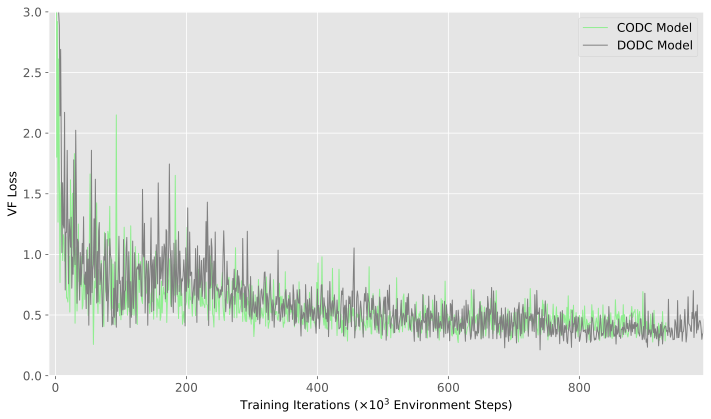

In [25]:
xlim = 250
line_width = 1

for i, id in enumerate(ids):

    fig, axs = plt.subplots(figsize=figsize)
    
    # Plot each series with distinct styles
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
    #         '#bcbd22', '#17becf', '#8c6bb1', '#e7969c', '#7a5195', '#ef5675', '#ffa600', '#d4a6c8']

    plt.plot(vf_loss_all_agents_CODC[f'vf_loss_{id}'], \
            label='CODC Model', color='lightgreen', linewidth=line_width, linestyle='-')

    plt.plot(vf_loss_all_agents_DODC[f'vf_loss_{id}'], \
            label='DODC Model', color="grey", linewidth=line_width, linestyle='-')

    # , label='Capped', linewidth=line_width, color='green')

    # axs[0].set_title('Policy 1', fontsize=12, fontweight='bold')
    # plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')

#     plt.legend(title='Model', title_fontsize= '13', fontsize='12', loc='best')
    plt.legend(fontsize='12', loc='best')
    plt.xlabel(r'Training Iterations ($\times 10^3$ Environment Steps)', fontsize=12)

    plt.ylabel(r'VF Loss', fontsize=12)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=12)

    plt.xlim([-10,990])
    plt.ylim([0,3])

    # Set the style of the plot
    plt.style.use('ggplot')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1])

    # Save the plot to a file
    plt.savefig(os.path.join(path_to_save_figs, "vf_loss", "individual_vf_loss_for_CODC_and_dtde", f"{id}.pdf"), dpi=10000)

    # Show the plot
    plt.show()
    plt.close()

## Get Policy reward mean Averaged for all Agents - Mean Policy Reward Across Training Iterations

In [40]:
path_to_save_mean_reward = os.path.join("images_for_report_4x4", "training_policy_reward")
os.makedirs(path_to_save_mean_reward, exist_ok=True)

In [41]:
def get_policy_reward_dict_mean_values(log_file):
    x = [f"ray/tune/policy_reward_mean/{id}" for id in ids]

    policy_reward_dict = {tag:0 for tag in x}

    policy_reward_series_dict = {tag:[] for tag in x}

    for summary in summary_iterator(os.path.abspath(log_file)):
        for value in summary.summary.value:
            if value.tag in x:
                policy_reward_dict[value.tag] = value.simple_value
                policy_reward_series_dict[value.tag].append(value.simple_value)
    
    return policy_reward_series_dict 

In [42]:
policy_reward_series_dict_CODC = pd.DataFrame(get_policy_reward_dict_mean_values(CODC_trained_training_results_tf))
policy_reward_series_dict_DODC = pd.DataFrame(get_policy_reward_dict_mean_values(DODC_trained_training_results_tf))

In [43]:
policy_reward_series_dict_CODC_average_across_all_agents = \
    policy_reward_series_dict_CODC.mean(axis=1)

policy_reward_series_dict_dtde_average_across_all_agents = \
    policy_reward_series_dict_DODC.mean(axis=1)

In [44]:
policy_reward_series_dict_dtde_average_across_all_agents

0     -216.917090
1     -218.388361
2     -218.388361
3     -218.388361
4     -218.388361
5     -218.388361
6     -216.617713
7     -217.177133
8     -217.177133
9     -217.177133
10    -217.177133
11    -217.177133
12    -216.109834
13    -216.065060
14    -216.065060
15    -216.065060
16    -216.065060
17    -216.065060
18    -214.442750
19    -214.440617
20    -214.440617
21    -214.440617
22    -214.440617
23    -214.440617
24    -213.799591
25    -213.733564
26    -213.733564
27    -213.733564
28    -213.733564
29    -213.733564
30    -212.592283
31    -212.453593
32    -212.453593
33    -212.453593
34    -212.453593
35    -212.453593
36    -211.697453
37    -211.618298
38    -211.618298
39    -211.618298
40    -211.618298
41    -211.618298
42    -210.831074
43    -210.696993
44    -210.696993
45    -210.696993
46    -210.696993
47    -210.696993
48    -209.864611
49    -209.869935
50    -209.869935
51    -209.869935
52    -209.869935
53    -209.869935
54    -209.309076
55    -209

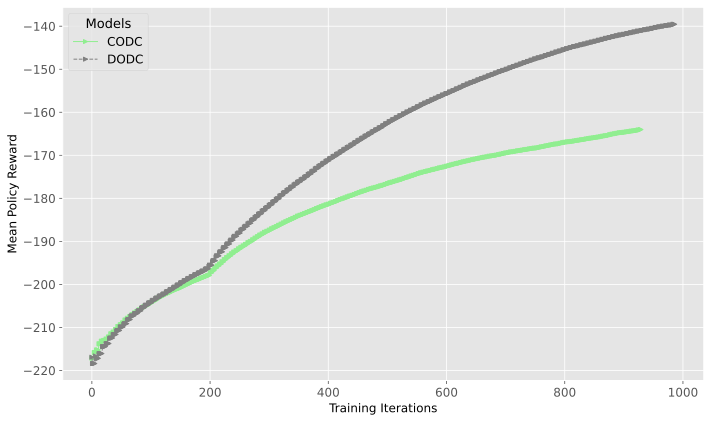

In [55]:
xlim = 250
line_width = 1
markersize = 4

fig, axs = plt.subplots(figsize=figsize)
markers = ['>']
# Plot each series with distinct styles
plt.plot(policy_reward_series_dict_CODC_average_across_all_agents, \
         label='CODC', linewidth=line_width, linestyle='-', color='lightgreen', \
            marker=markers[0], markersize=markersize)
plt.plot(policy_reward_series_dict_dtde_average_across_all_agents,\
          label='DODC', linewidth=line_width, linestyle='--', color='grey', \
          marker=markers[0],markersize=markersize)

# , label='Capped', linewidth=line_width, color='green')

# axs[0].set_title('Policy 1', fontsize=12, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')

plt.legend(title='Models', title_fontsize= '13', fontsize='12', loc='best')
# ($\times 10^3$ Environment Steps)
plt.xlabel(r'Training Iterations', fontsize=12)
# plt.xlim([0,153])
plt.ylabel(r'Mean Policy Reward', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# plt.ylim([0,50])
path_to_save_figs = os.path.abspath("images_for_report_4x4")

# Save the plot to a file
# fig.savefig(os.path.join(path_to_save_figs, "training_policy_reward", "mean_policy_reward_both_ctce_dtde.pdf"), dpi=10000)
plt.savefig(os.path.join(path_to_save_figs, "training_policy_reward", "mean_policy_reward_both_ctce_dtde_changed_label.pdf"), dpi=10000)

# Show the plot
plt.show()
# plt.close()

## Get Policy Reward for every agent, for CODC

In [ ]:
policy_reward_series_dict_CODC.columns

Index(['ray/tune/policy_reward_mean/A3', 'ray/tune/policy_reward_mean/B3', 'ray/tune/policy_reward_mean/C3', 'ray/tune/policy_reward_mean/D3', 'ray/tune/policy_reward_mean/A2', 'ray/tune/policy_reward_mean/B2', 'ray/tune/policy_reward_mean/C2', 'ray/tune/policy_reward_mean/D2', 'ray/tune/policy_reward_mean/A1', 'ray/tune/policy_reward_mean/B1', 'ray/tune/policy_reward_mean/C1', 'ray/tune/policy_reward_mean/D1', 'ray/tune/policy_reward_mean/A0', 'ray/tune/policy_reward_mean/B0', 'ray/tune/policy_reward_mean/C0', 'ray/tune/policy_reward_mean/D0'], dtype='object')

In [ ]:
xlim = 250
line_width = 2
markersize=1

fig, axs = plt.subplots(figsize=figsize)
# Plot each series with distinct styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#8c6bb1', '#e7969c', '#7a5195', '#ef5675', '#ffa600', '#d4a6c8']
for i, id in enumerate(ids):
    plt.plot(policy_reward_series_dict_CODC[f'ray/tune/policy_reward_mean/{id}'], \
            label=f'{id}', color=colors[i], linewidth=line_width, linestyle='-', 
            marker='>', markersize=markersize)

# , label='Capped', linewidth=line_width, color='green')

# axs[0].set_title('Policy 1', fontsize=12, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')

plt.legend(title='Policy IDs', title_fontsize= '13', fontsize='12', loc='best', ncols=2)
plt.xlabel(r'Training Iterations ($\times 10^3$ Environment Steps)', fontsize=12)

plt.ylabel(r'Mean Policy Reward Averaged Over All Agents', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.xlim([-10,990])
# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_figs, "training_policy_reward", "Mean_reward_for_all_agents_CODC.pdf"), dpi=10000)

# Show the plot
plt.show()
# plt.close()

## Get Policy Reward for every agent, for DTDE

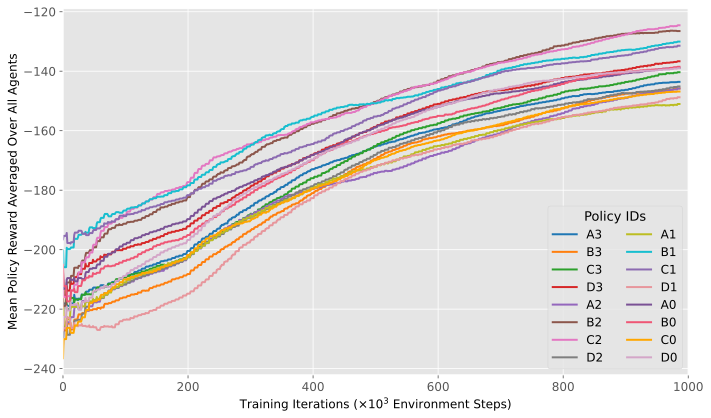

In [ ]:
xlim = 250
line_width = 2

fig, axs = plt.subplots(figsize=figsize)
# Plot each series with distinct styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#8c6bb1', '#e7969c', '#7a5195', '#ef5675', '#ffa600', '#d4a6c8']
for i, id in enumerate(ids):
    plt.plot(policy_reward_series_dict_DODC[f'ray/tune/policy_reward_mean/{id}'], \
            label=f'{id}', color=colors[i], linewidth=line_width, linestyle='-')

# , label='Capped', linewidth=line_width, color='green')

# axs[0].set_title('Policy 1', fontsize=12, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')

plt.legend(title='Policy IDs', title_fontsize= '13', fontsize='12', loc='lower right', ncols=2)
plt.xlabel(r'Training Iterations ($\times 10^3$ Environment Steps)', fontsize=12)

plt.ylabel(r'Mean Policy Reward Averaged Over All Agents', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.xlim([0,1000])
# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# Save the plot to a file
plt.savefig(os.path.join(path_to_save_figs, "training_policy_reward", "Mean_reward_for_all_agents_dtce.pdf"), dpi=10000)

# Show the plot
plt.show()
# plt.close()